Ler wav
Fazer o especro do sinal
Filtro passa baixo
    Desenhar o filtro
    Aplicar o filtro
    Espectro

In [275]:
#fs, dados = wavefile.read('   .wav')
#duracao = len(dados)/fs
#t = np.array(0,duracao,1/fs), 1/fs = TS período de amaostra

In [276]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile

In [277]:
fs, dados = wavfile.read('FalaSala.wav')

C:\Users\tiago\AppData\Local\Temp\ipykernel_16608\1718529783.py:1: WavFileWarning: Chunk (non-data) not understood, skipping it.
  fs, dados = wavfile.read('FalaSala.wav')


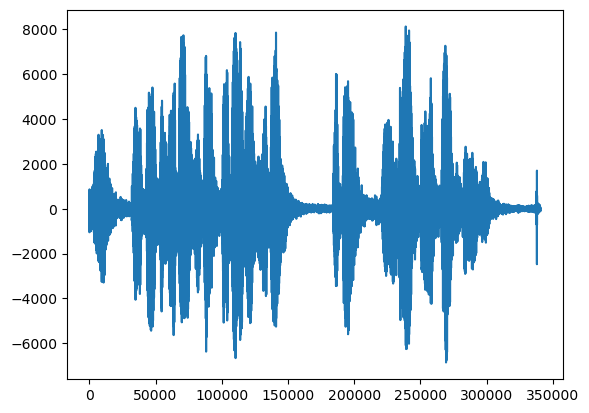

In [278]:
plt.plot(dados)

In [279]:
t = np.arange(0, len(dados)/fs-1/fs, 1/fs)

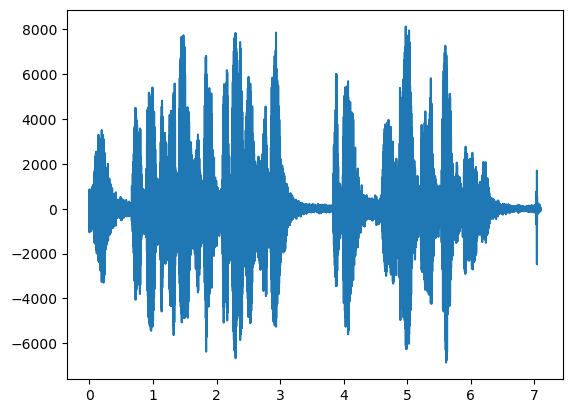

In [280]:
plt.plot(t, dados)

$ Espectro $

In [282]:
#fazer o espectro
X = np.fft.fft(dados)/len(dados)


In [283]:
f = np.arange(len(X), dtype = 'float') * fs / len(X)

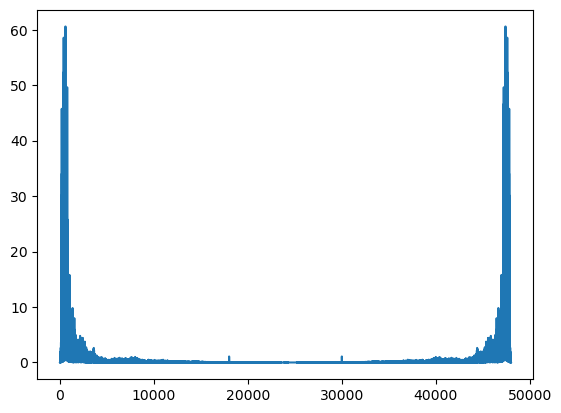

In [284]:
plt.plot(f, np.abs(X))
#FS = 48000HZ
#fmax = FS/2 = 24000HZ

In [285]:
from scipy import signal

In [286]:
fc = 8000 #frequencia de corte do filtro
numtaps = 101 #numero de coeficientes
bk = signal.firwin(numtaps, fc, fs = fs) #cria um filtro FIR passa baixo

In [287]:
f1, H1 = signal.freqz(bk, fs = fs) # calcular a resposta em frequencia

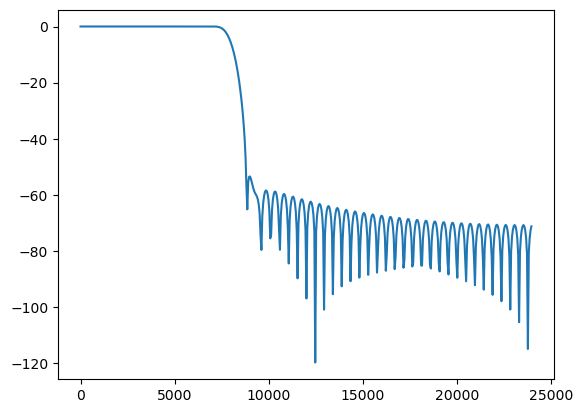

In [288]:
#plt.plot(f1, np.abs(H1)) #visualizaçao do modulo da resposta em frequancia |H(w)|
plt.plot(f1, 20*np.log10((np.abs(H1)))) #visualizaçao do modulo da resposta em frequancia |H(w)| dB

 $ Filtragem $

In [290]:
y = signal.lfilter(bk, [1], dados)

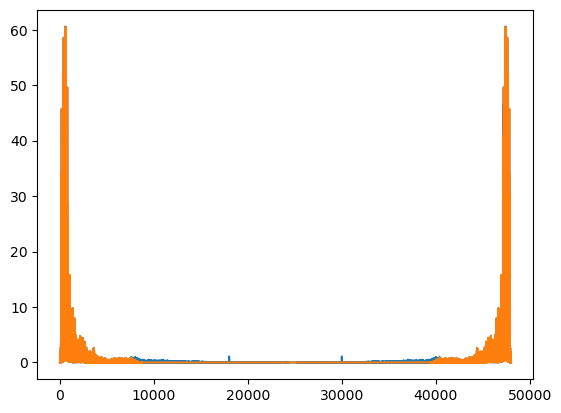

In [291]:
Y = np.fft.fft(y)/len(y)
plt.plot(f, np.abs(X))
plt.plot(f, np.abs(Y))
#plt.axis([6000,1000],[0,10])

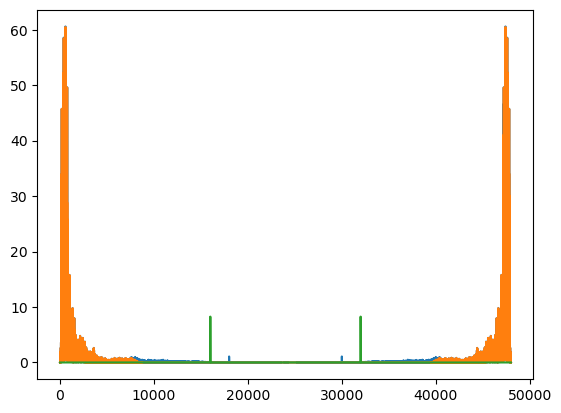

In [292]:
portadora = 20 * np.cos(2*np.pi*16000*t)
Z = np.fft.fft(portadora/len(portadora))
plt.plot(f, np.abs(X))
plt.plot(f, np.abs(Y))
plt.plot(f, np.abs(Z))

$  Modulação $

In [294]:
novoSinal = y*portadora

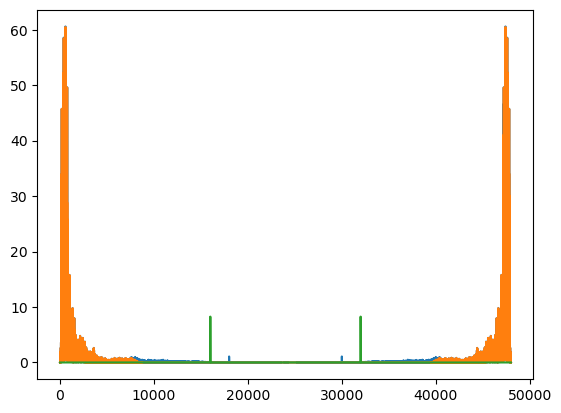

In [295]:
N = np.fft.fft(novoSinal/len(novoSinal))/20
plt.plot(f, np.abs(X))
plt.plot(f, np.abs(Y))
plt.plot(f, np.abs(Z))

In [296]:
from IPython.display import Audio
Audio(novoSinal, rate=fs, normalize= True)

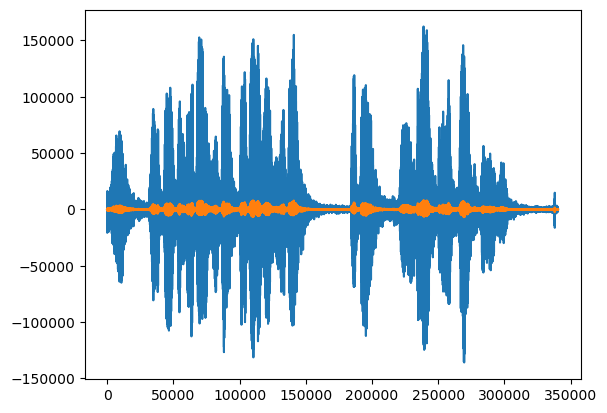

In [297]:
plt.plot(novoSinal)
plt.plot(dados)

In [298]:
print(np.max(novoSinal))
print(np.min(novoSinal))

162280.7682379325
-135793.30827163992


In [299]:
novoSinal2 = (novoSinal/np.max(novoSinal)) * 2**15

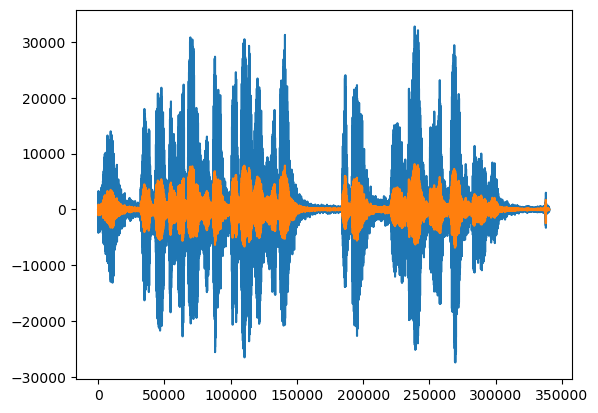

In [300]:
plt.plot(novoSinal2) #Sinal em datatype float-64
plt.plot(dados)

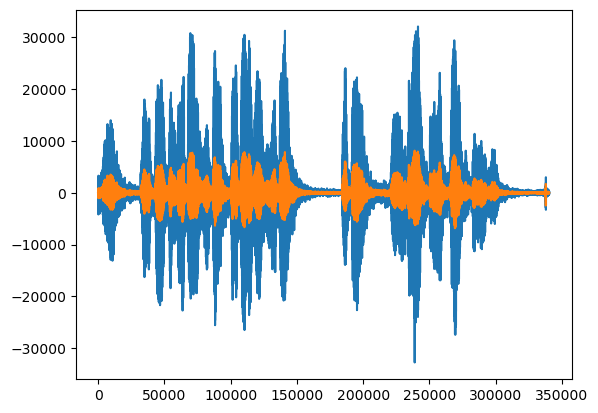

In [301]:
plt.plot(novoSinal2.astype('int16')) #Sinal datatype int-16
plt.plot(dados)

 Criação de Filtro de Passa Alto 

In [303]:
fc = 8000 #frequencia de corte do filtro
numtaps = 101 #numero de coeficientes
bk = signal.firwin(numtaps, fc, fs = fs, pass_zero = 'highpass' ) #cria um filtro FIR passa alto

In [304]:
f1, H1 = signal.freqz(bk, fs = fs) # calcular a resposta em frequencia

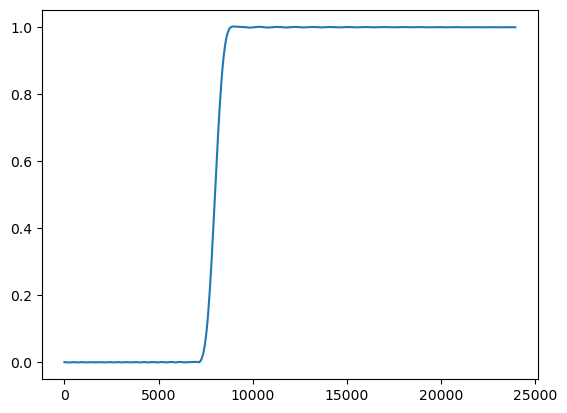

In [305]:
plt.plot(f1,np.abs(H1))

In [306]:
y_novo = signal.lfilter(bk, [1], novoSinal2)

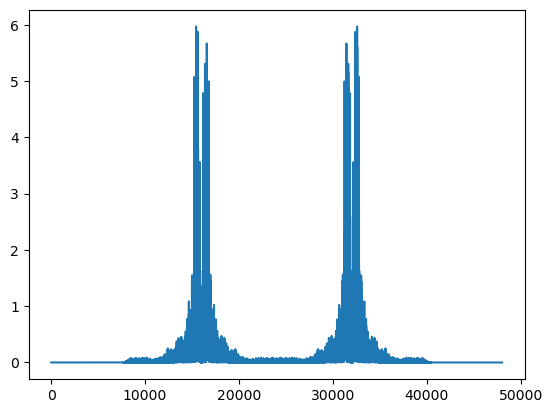

In [307]:
NN = np.fft.fft(y_novo)/len(y_novo)/20
plt.plot(f, np.abs(NN))

In [308]:
SinalQuaseFinal = y_novo * portadora
SinalFinal = signal.lfilter(bk, [1], SinalQuaseFinal)

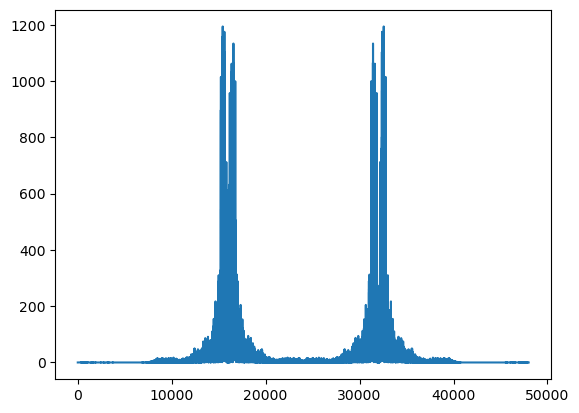

In [309]:
NNN = np.fft.fft(SinalFinal/len(SinalFinal))
plt.plot(f, np.abs(NNN))

In [310]:
Audio(SinalFinal, rate=fs, normalize= True)

In [311]:
# np.__version__ #dá print da versão do numpy